In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\苏安宇\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\苏安宇\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# 一、查看数据集

In [2]:
#读取数据集
data = pd.read_csv(r".\vgsales.csv")
#查看数据前5行
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


查看数据集可以看到文件的列名有Rank（排名）、Name（名称）、Platform（平台）、Year（年份）、Genre（类型）、Publisher（出版商）、各个地区的销售额（NA_Sales（北美）、EU_Sales（欧洲）、JP_Sales（日本）、Other_Sales（其他地区））和Global_Sales（全球销售额），单位百万。


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


数据规模： DataFrame 包含 16,598 条记录（行），共 11 列

发现Year和Publisher中存在空值，接下来应进行数据清洗来提高后续数据分析的准确性

# 二、数据清洗

In [4]:
# 检查并处理重复值
duplicates = data.duplicated().sum()
if duplicates > 0:
    print(f"存在重复值，共有 {duplicates} 条重复记录。")
    data.drop_duplicates(inplace=True)
else:
    print("没有重复值。")

没有重复值。


In [5]:
# 检查缺失值
missing_values = data.isnull().sum()
if missing_values.any():
    print("存在缺失值:")
    print(missing_values[missing_values > 0])
else:
    print("没有缺失值。")

存在缺失值:
Year         271
Publisher     58
dtype: int64


Year的缺失率为1.6%，Publisher的缺失率为0.3%，所占比都较小，故删去影响不大

In [6]:
data = data.dropna(subset=['Year','Publisher'])

In [7]:
#再次查看
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


已成功清洗

# 三、描述性统计分析

In [8]:
#展示数据的数值型描述统计值
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


得到平均/最高/最低销售额、销售额分布（如中位数、标准差）

## 1、基于平台

In [9]:
# 统计各游戏平台上的游戏数量
platform_counts = data['Platform'].value_counts()
platform_counts

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

不同游戏平台游戏数量差距巨大，一定程度上反映了游戏平台的受欢迎程度

In [10]:
# 按平台分组，计算各平台的全球销售额总和
platform_sales = data.groupby('Platform')['Global_Sales'].sum()
# 计算总销售额
total_sales = platform_sales.sum()
# 计算各平台销售额占比
sales_percentage = platform_sales / total_sales * 100
# 合并游戏数量和销售额占比到一个新的 DataFrame
result = pd.DataFrame({
    '游戏数量': platform_counts,
    '全球销售额占比(%)': sales_percentage
})
# 按销售额占比进行降序排序
result = result.sort_values(by='全球销售额占比(%)', ascending=False)
# 显示结果
result

,游戏数量,全球销售额占比(%)
Platform,,
PS2,2127,13.997551
X360,1234,11.003215
PS3,1304,10.773414
Wii,1290,10.324706
DS,2131,9.293155
PS,1189,8.254567
GBA,786,3.468237
PSP,1197,3.310383
PS4,336,3.155934


从数据中我们可以推测出不同游戏平台的市场活跃度和商业价值。例如，PS2 平台游戏数量较多且销售额占比最高，说明该平台在市场上非常受欢迎，商业成功度较高。而像 3DO、GG、PCFX 等平台游戏数量少且销售额占比极低，可能这些平台在市场竞争中处于劣势，受众较少或者运营时间较短等。

## 2、基于游戏类型

In [11]:
#展示前 5 名最畅销的游戏类型及其全球销售额
top_5_genre = data.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head()
top_5_genre = pd.DataFrame({
    '游戏类型': top_5_genre.index,  # 游戏类型
    '全球总销量（百万）': top_5_genre.values,  # 全球销售额
})
top_5_genre

,游戏类型,全球总销量（百万）
0,Action,1722.84
1,Sports,1309.24
2,Shooter,1026.20
3,Role-Playing,923.83
4,Platform,829.13


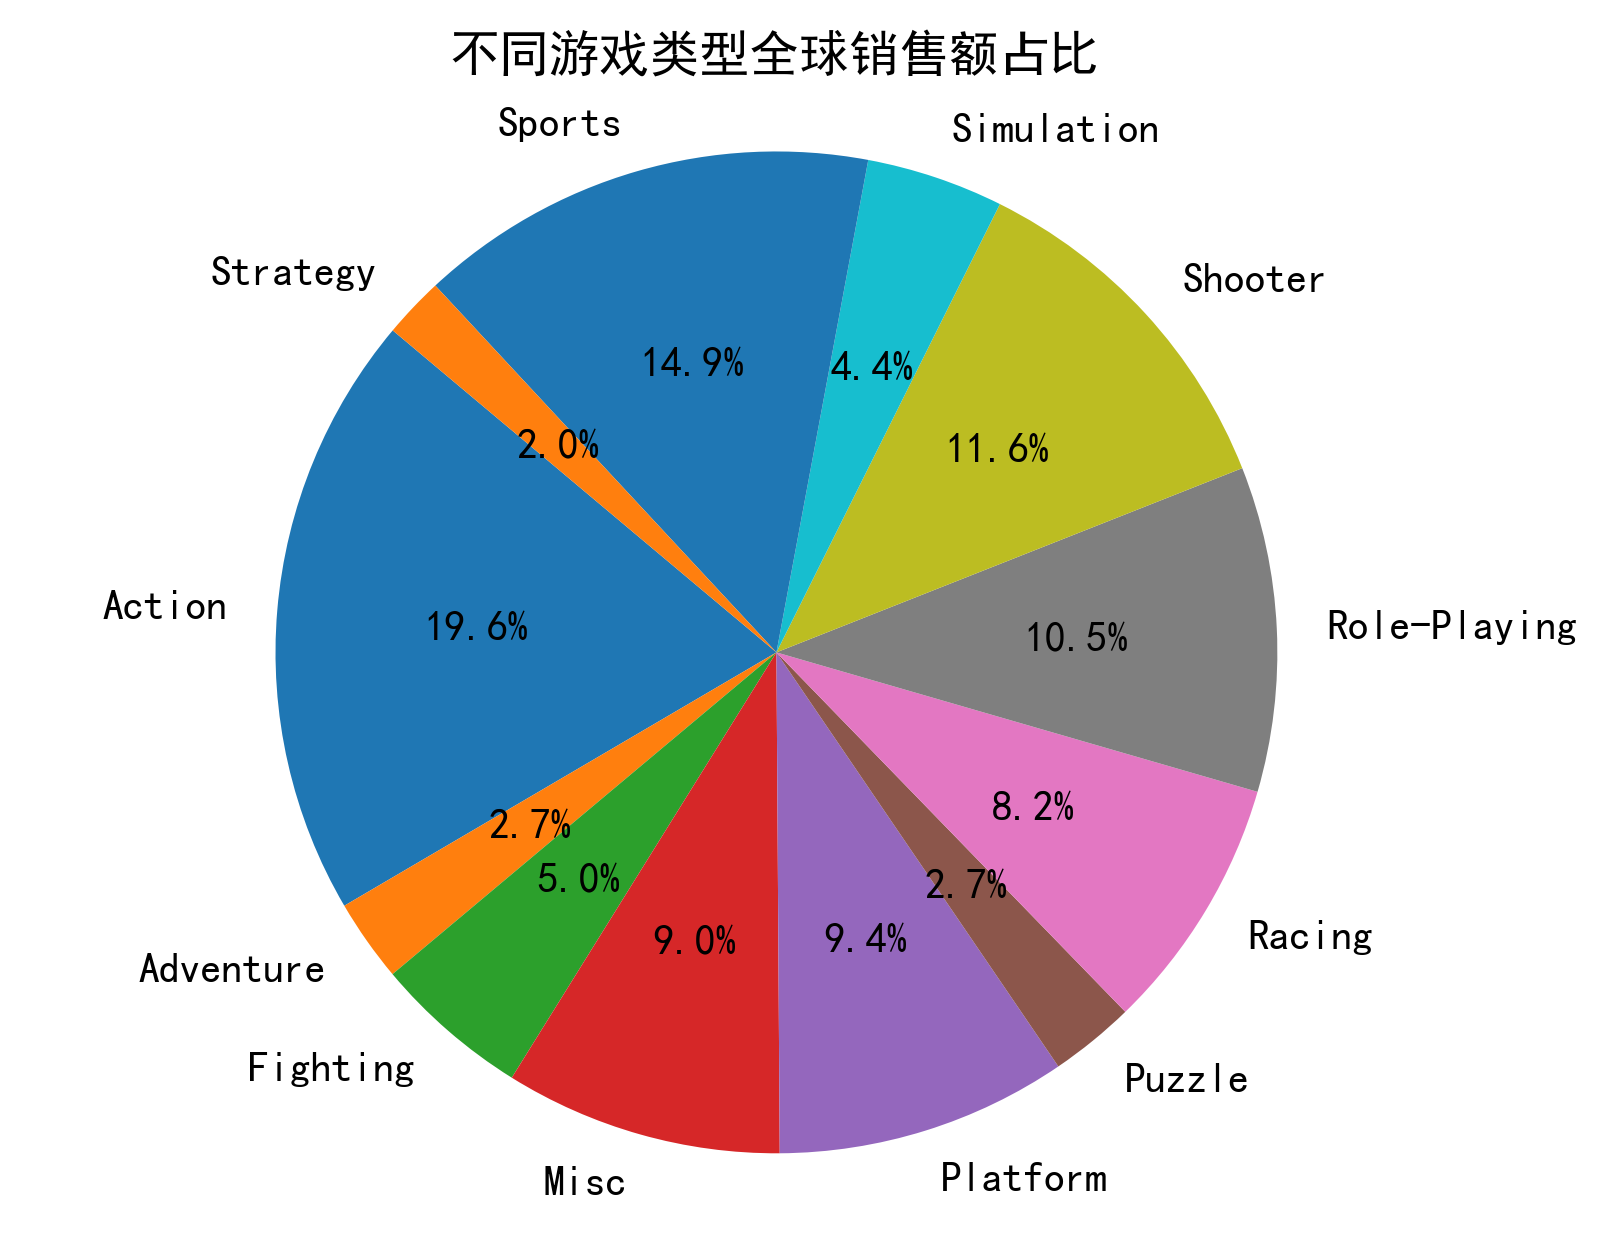

In [12]:
# 按游戏类型分组，计算各类型的全球销售额总和
genre_sales = data.groupby('Genre')['Global_Sales'].sum()
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 选择一个支持中文的字体
plt.rcParams['axes.unicode_minus'] = False  # 确保负号可以正常显示
# 绘制饼状图
plt.pie(genre_sales, labels=genre_sales.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('不同游戏类型全球销售额占比')
plt.show()

从前 5 名最畅销的游戏类型和饼状图中可以看出当前受欢迎的游戏类型。例如，Action、Sports、Shooter、Role-Playing这些类型的游戏全球销售额占比超过10%。

## 3、基于发行商

In [13]:
# 计算全球总销售额
total_global_sales = data['Global_Sales'].sum()
# 按发行商分组，计算每个发行商的全球销售额总和
publisher_sales = data.groupby('Publisher')['Global_Sales'].sum()
# 计算各发行商的市场份额
market_shares = (publisher_sales / total_global_sales) * 100
# 对市场份额进行降序排序，并选取前五
top_five = market_shares.sort_values(ascending=False).head(5)
# 输出结果
print("市场份额前五的发行商：")
for publisher, share in top_five.items():
    print(f"发行商 {publisher} 的市场份额为 {share:.2f}%")

市场份额前五的发行商：
发行商 Nintendo 的市场份额为 20.25%
发行商 Electronic Arts 的市场份额为 12.41%
发行商 Activision 的市场份额为 8.19%
发行商 Sony Computer Entertainment 的市场份额为 6.89%
发行商 Ubisoft 的市场份额为 5.37%


从这前五名发行商的市场份额数据可以看出，游戏市场呈现出较为集中的态势。前五名发行商占据了相当大的市场比例，这表明游戏行业的头部效应明显，少数大型发行商主导着市场走向。这也意味着新进入者想要在市场中获得一席之地面临着较大的竞争压力，需要有独特的产品和营销策略。

## 4、区域对比

北美销售占比: 49.11%
欧洲销售占比: 27.31%
日本销售占比: 14.57%
其他地区销售占比: 8.95%

北美销量排名前五的游戏：
Wii Sports: 41.49 百万份
Super Mario Bros.: 29.08 百万份
Duck Hunt: 26.93 百万份
Tetris: 23.2 百万份
Mario Kart Wii: 15.85 百万份

欧洲销量排名前五的游戏：
Wii Sports: 29.02 百万份
Mario Kart Wii: 12.88 百万份
Wii Sports Resort: 11.01 百万份
Nintendogs: 11.0 百万份
Grand Theft Auto V: 9.27 百万份

日本销量排名前五的游戏：
Pokemon Red/Pokemon Blue: 10.22 百万份
Pokemon Gold/Pokemon Silver: 7.2 百万份
Super Mario Bros.: 6.81 百万份
New Super Mario Bros.: 6.5 百万份
Pokemon Diamond/Pokemon Pearl: 6.04 百万份

其他地区销量排名前五的游戏：
Grand Theft Auto: San Andreas: 10.57 百万份
Wii Sports: 8.46 百万份
Gran Turismo 4: 7.53 百万份
Grand Theft Auto V: 4.14 百万份
Mario Kart Wii: 3.31 百万份


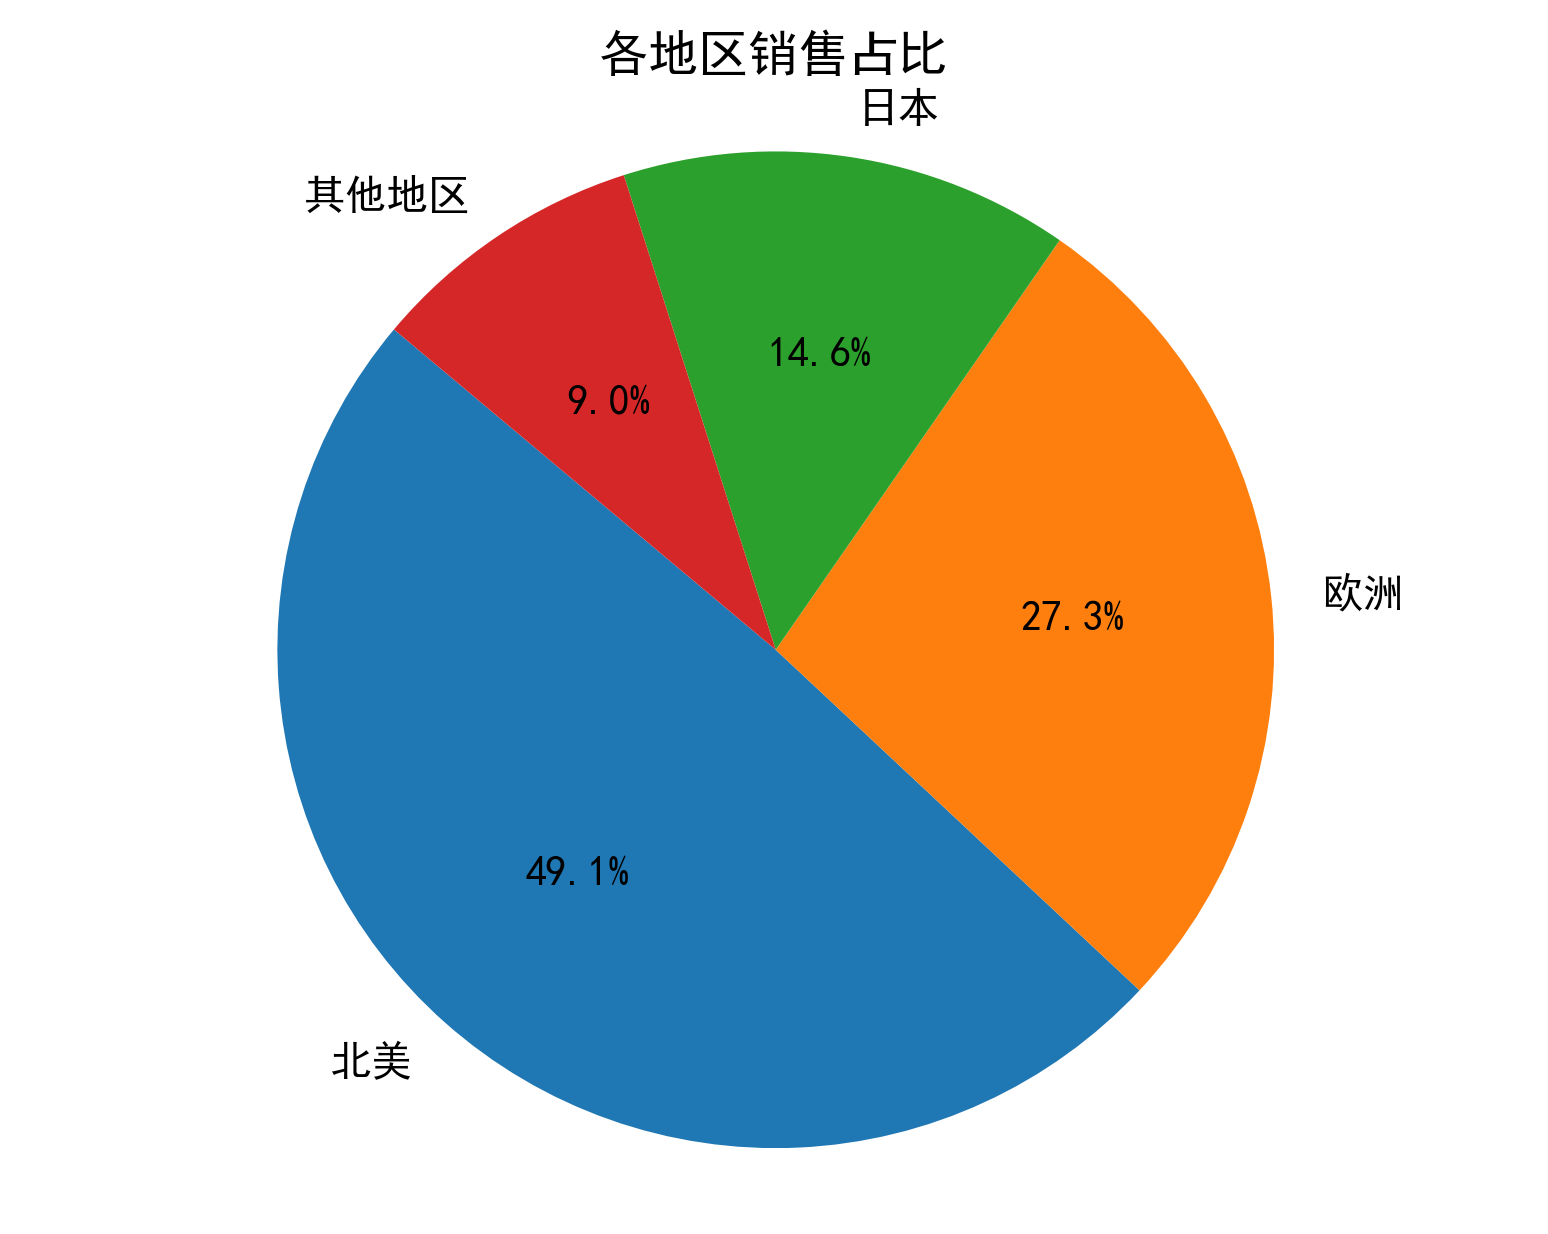

In [14]:
# 计算各地区总销售额
na_total_sales = data['NA_Sales'].sum()
eu_total_sales = data['EU_Sales'].sum()
jp_total_sales = data['JP_Sales'].sum()
other_total_sales = data['Other_Sales'].sum()
global_total_sales = data['Global_Sales'].sum()

# 计算各地区销售占比
na_percentage = (na_total_sales / global_total_sales) * 100
eu_percentage = (eu_total_sales / global_total_sales) * 100
jp_percentage = (jp_total_sales / global_total_sales) * 100
other_percentage = (other_total_sales / global_total_sales) * 100

# 输出各地区销售占比
print(f"北美销售占比: {na_percentage:.2f}%")
print(f"欧洲销售占比: {eu_percentage:.2f}%")
print(f"日本销售占比: {jp_percentage:.2f}%")
print(f"其他地区销售占比: {other_percentage:.2f}%")

# 找出各地区销量排名前五的游戏
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
region_names = ['北美', '欧洲', '日本', '其他地区']

for region, region_name in zip(regions, region_names):
    top_five = data.nlargest(5, region)[['Name', region]]
    print(f"\n{region_name}销量排名前五的游戏：")
    for index, row in top_five.iterrows():
        print(f"{row['Name']}: {row[region]} 百万份")

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 绘制饼图
labels = ['北美', '欧洲', '日本', '其他地区']
sizes = [na_percentage, eu_percentage, jp_percentage, other_percentage]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('各地区销售占比')
plt.show()

各地区销售占比分析

北美：以 49.11% 的销售占比位居首位，占据了全球市场近一半的份额，这表明北美是全球最大的游戏消费市场。其庞大的人口基数、较高的人均收入水平以及浓厚的游戏文化氛围，都为游戏市场的繁荣提供了有利条件。北美消费者对游戏的接受度和购买力都很强，游戏产业在这里拥有广阔的发展空间。

欧洲：销售占比为 27.31%，是全球游戏市场的重要组成部分。欧洲有着丰富的文化多样性和庞大的消费群体，不同国家和地区对游戏类型可能有不同的偏好，但总体上游戏市场也十分发达。与北美市场相互补充，共同推动全球游戏产业的发展。

日本：占比 14.57%，虽然在全球市场份额中低于北美和欧洲，但日本拥有独特且成熟的游戏文化。日本游戏产业以其创新的游戏玩法、精美的画面和丰富的故事情节而闻名于世。本土的游戏厂商和 IP 在国内市场具有极高的人气和忠诚度，同时也在全球范围内拥有大量粉丝。

其他地区：销售占比 8.95%，虽然相对较小，但随着全球互联网的普及和游戏市场的不断拓展，这些地区的游戏市场也在逐渐崛起。新兴市场的潜力巨大，未来可能会成为游戏产业新的增长点。

各地区销量前五游戏分析

北美地区-多样化的经典游戏：排名前五的游戏中既有像《Wii Sports》这样的休闲运动类游戏，适合全家一起游玩，体现了北美市场对家庭娱乐游戏的喜爱；也有《Super Mario Bros.》《Duck Hunt》《Tetris》等经典游戏，这些游戏具有简单易上手、趣味性强的特点，跨越了多个年龄段，在北美市场拥有深厚的群众基础。《Mario Kart Wii》作为赛车类游戏，以其可爱的角色和刺激的赛道吸引了大量玩家。整体来看，北美市场对各种类型的经典游戏都有较高的接受度。

欧洲地区-休闲与热门大作并存：《Wii Sports》同样在欧洲销量领先，说明休闲运动类游戏在欧洲也有广泛的受众。《Mario Kart Wii》和《Wii Sports Resort》等任天堂的游戏也很受欢迎，体现了欧洲玩家对任天堂品牌和其独特游戏风格的认可。同时，《Nintendogs》这类模拟养成游戏也进入前五，显示出欧洲市场对不同类型游戏的包容。而《Grand Theft Auto V》作为一款大型开放世界游戏，凭借其丰富的内容和成熟的制作在欧洲也取得了不错的销量，反映出欧洲玩家对高品质、高自由度游戏的需求。

日本地区-Pokemon 与马里奥系列称霸：日本销量前五的游戏中，有四款是 Pokemon 系列游戏，这充分显示了 Pokemon 在日本本土的超高人气。Pokemon 系列以其可爱的精灵形象、丰富的养成系统和深厚的文化底蕴，成为了日本游戏文化的代表之一。另外，《Super Mario Bros.》和《New Super Mario Bros.》等马里奥系列游戏也备受青睐，马里奥作为任天堂的标志性 IP，在日本拥有极高的知名度和粉丝忠诚度。这表明日本玩家对本土经典 IP 有着强烈的认同感和喜爱。

其他地区-开放世界与经典游戏受宠：《Grand Theft Auto: San Andreas》和《Grand Theft Auto V》等开放世界游戏在其他地区销量靠前，说明这类游戏在新兴市场具有较大的吸引力，其丰富的内容和自由的玩法能够满足玩家的探索欲望。《Wii Sports》作为一款经典的休闲游戏，也在其他地区取得了不错的成绩，体现了休闲游戏的通用性和受欢迎程度。《Gran Turismo 4》作为赛车模拟游戏的代表作，在其他地区也有一定的市场份额，反映出其他地区玩家对不同类型游戏的需求逐渐多样化。

综合结论：不同地区的销售占比和畅销游戏反映了各地区独特的游戏文化和消费偏好。游戏厂商可以根据这些数据，有针对性地制定市场策略，在不同地区推广适合当地玩家口味的游戏。同时，随着全球游戏市场的不断融合和发展，各地区之间的游戏偏好也可能会相互影响，未来可能会出现更多跨地区受欢迎的游戏类型和 IP。

# 四、时间趋势分析

按年份统计的游戏数量：
Year
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     744
2005.0     936
2006.0    1008
2007.0    1201
2008.0    1428
2009.0    1431
2010.0    1257
2011.0    1136
2012.0     655
2013.0     546
2014.0     580
2015.0     614
2016.0     342
2017.0       3
2020.0       1
dtype: int64

按年份统计的总销售额：
Year
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.16
1993.0     45.98
1994.0     79.17
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.47
1999.0    251.27
2000.0    201.56
2001.0    

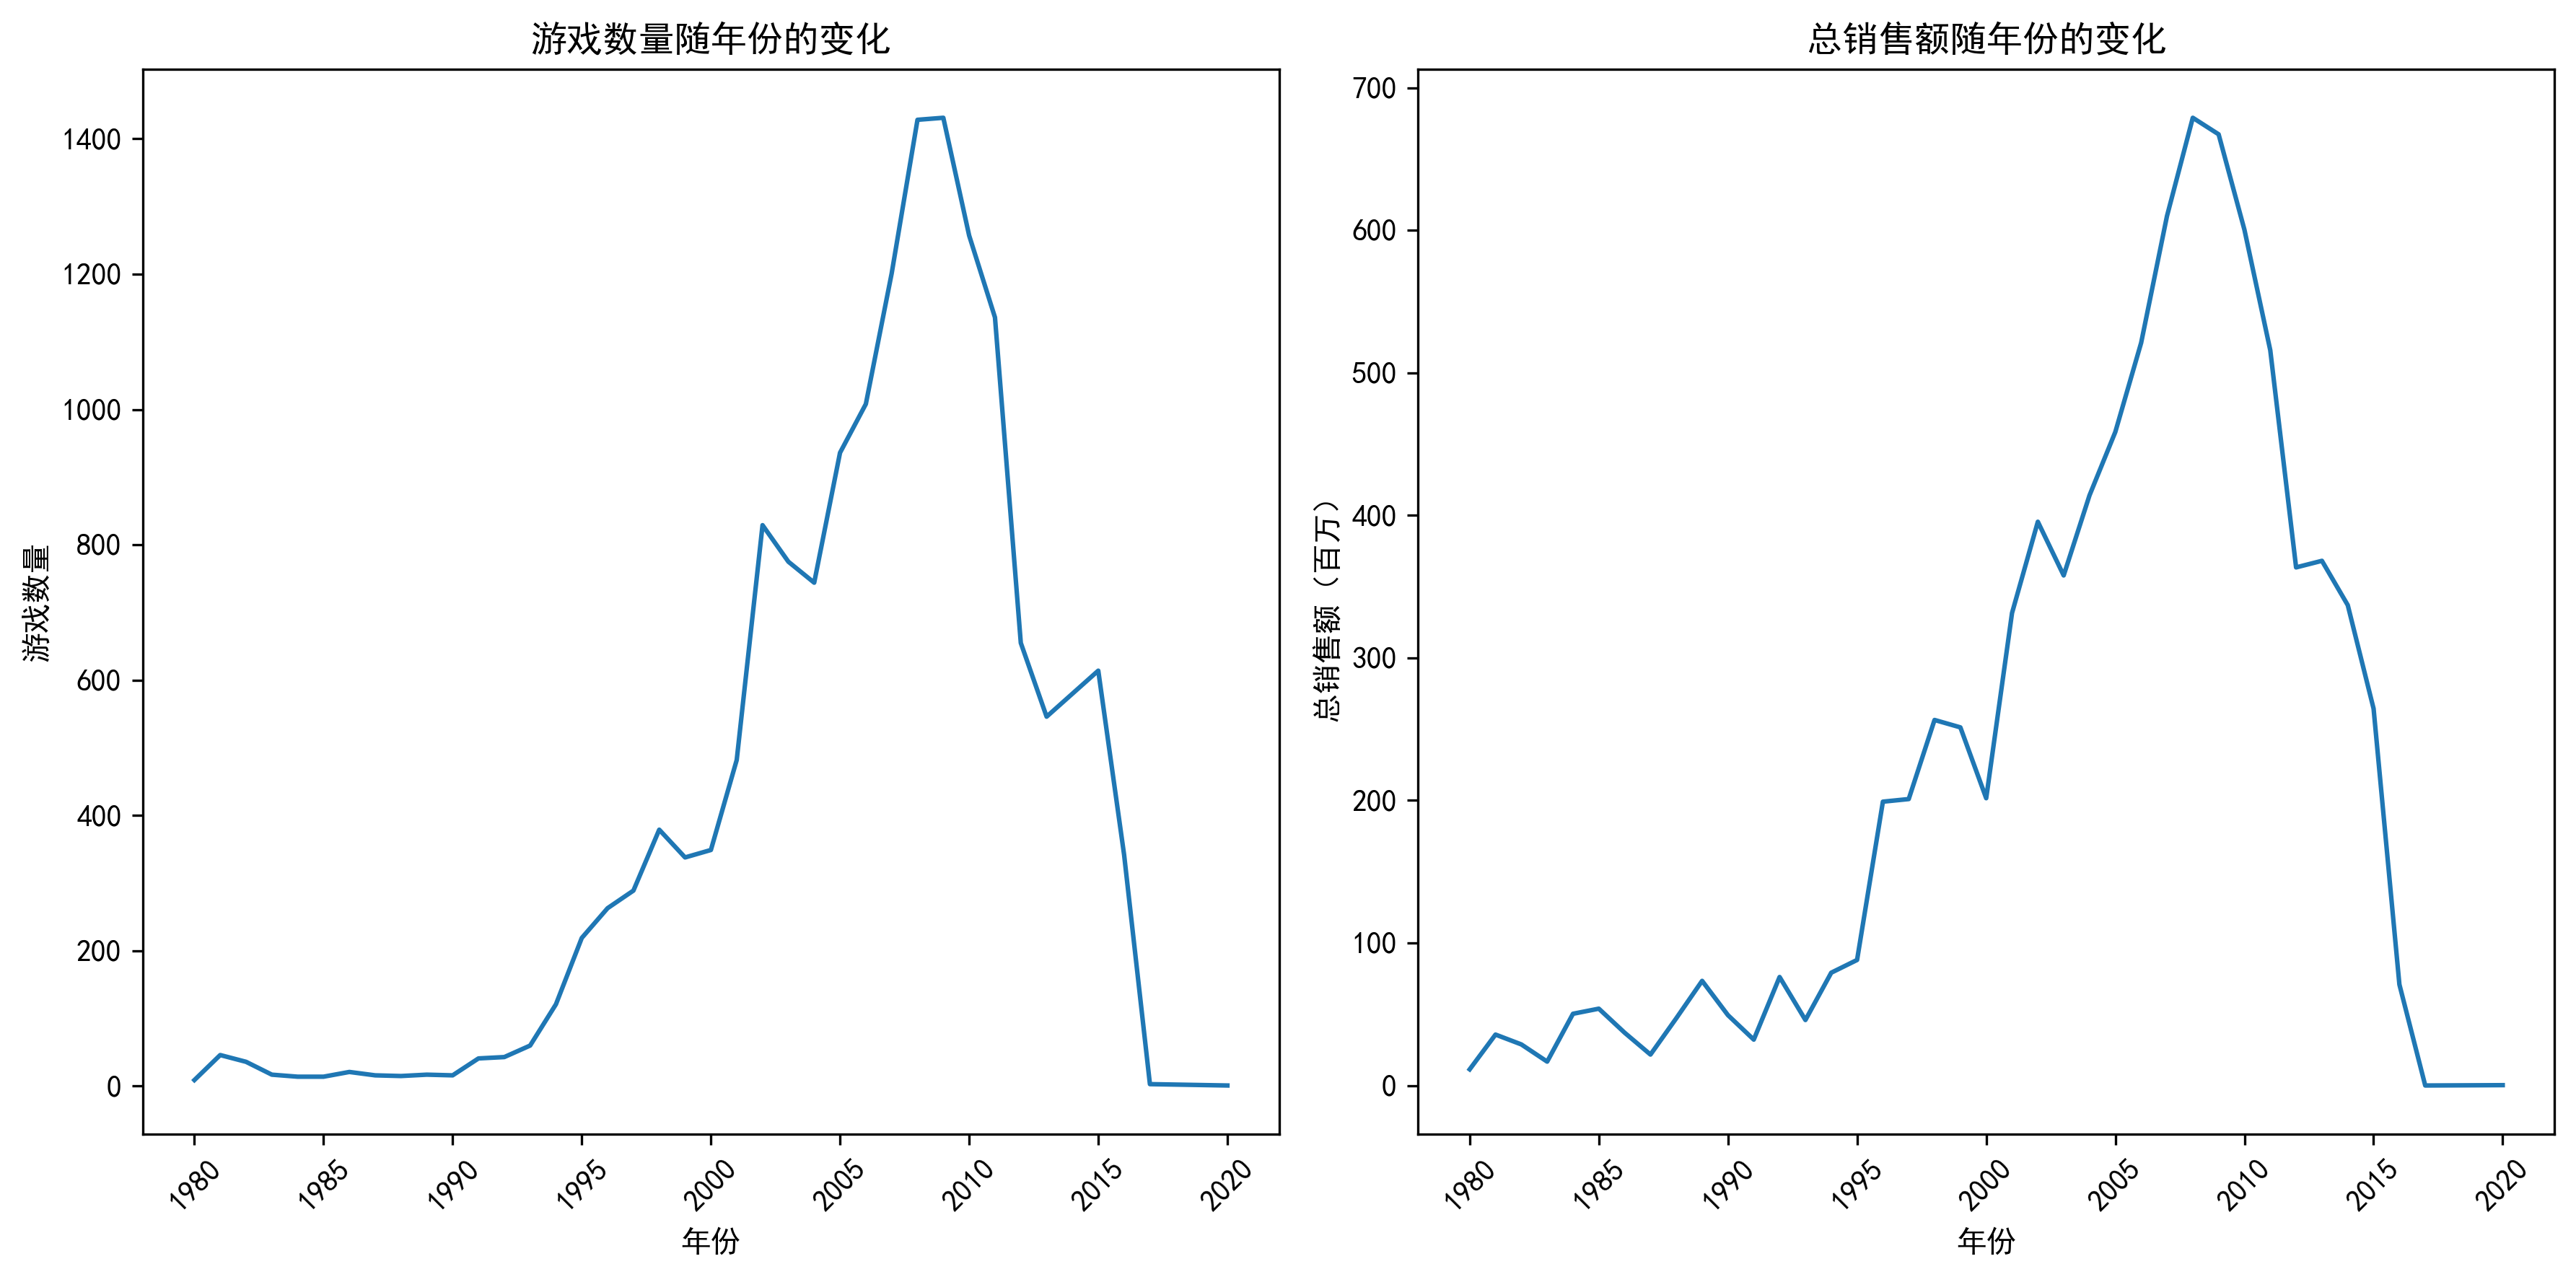

In [15]:
# 按年份分组统计游戏数量
game_count_by_year = data.groupby('Year').size()
# 按年份分组计算总销售额
total_sales_by_year = data.groupby('Year')['Global_Sales'].sum()
# 输出统计结果
print("按年份统计的游戏数量：")
print(game_count_by_year)
print("\n按年份统计的总销售额：")
print(total_sales_by_year)
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300
# 绘制游戏数量随年份变化的折线图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(game_count_by_year.index, game_count_by_year.values)
plt.title('游戏数量随年份的变化')
plt.xlabel('年份')
plt.ylabel('游戏数量')
plt.xticks(rotation=45)
# 绘制总销售额随年份变化的折线图
plt.subplot(1, 2, 2)
plt.plot(total_sales_by_year.index, total_sales_by_year.values)
plt.title('总销售额随年份的变化')
plt.xlabel('年份')
plt.ylabel('总销售额（百万）')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2016，2017，2020三年的数据异常，应该是数据采集不完全，数据缺失导致。1996-2009期间，游戏行业快速发展，游戏数量和销售额都快速增长，但2009年之后曲线开始波折，呈下滑趋势，表明游戏行业进入饱和，竞争加剧

# 五、平台与类型关联分析

## 1、平台偏好

销售额前五的游戏在各平台的销售表现：
Platform               GB    NES    PC   PS3    PS4    Wii   X360  XOne
Name                                                                   
Grand Theft Auto V    NaN    NaN  1.08  21.4  11.98    NaN  16.38  5.08
Mario Kart Wii        NaN    NaN   NaN   NaN    NaN  35.82    NaN   NaN
Super Mario Bros.    5.07  40.24   NaN   NaN    NaN    NaN    NaN   NaN
Tetris              30.26   5.58   NaN   NaN    NaN    NaN    NaN   NaN
Wii Sports            NaN    NaN   NaN   NaN    NaN  82.74    NaN   NaN


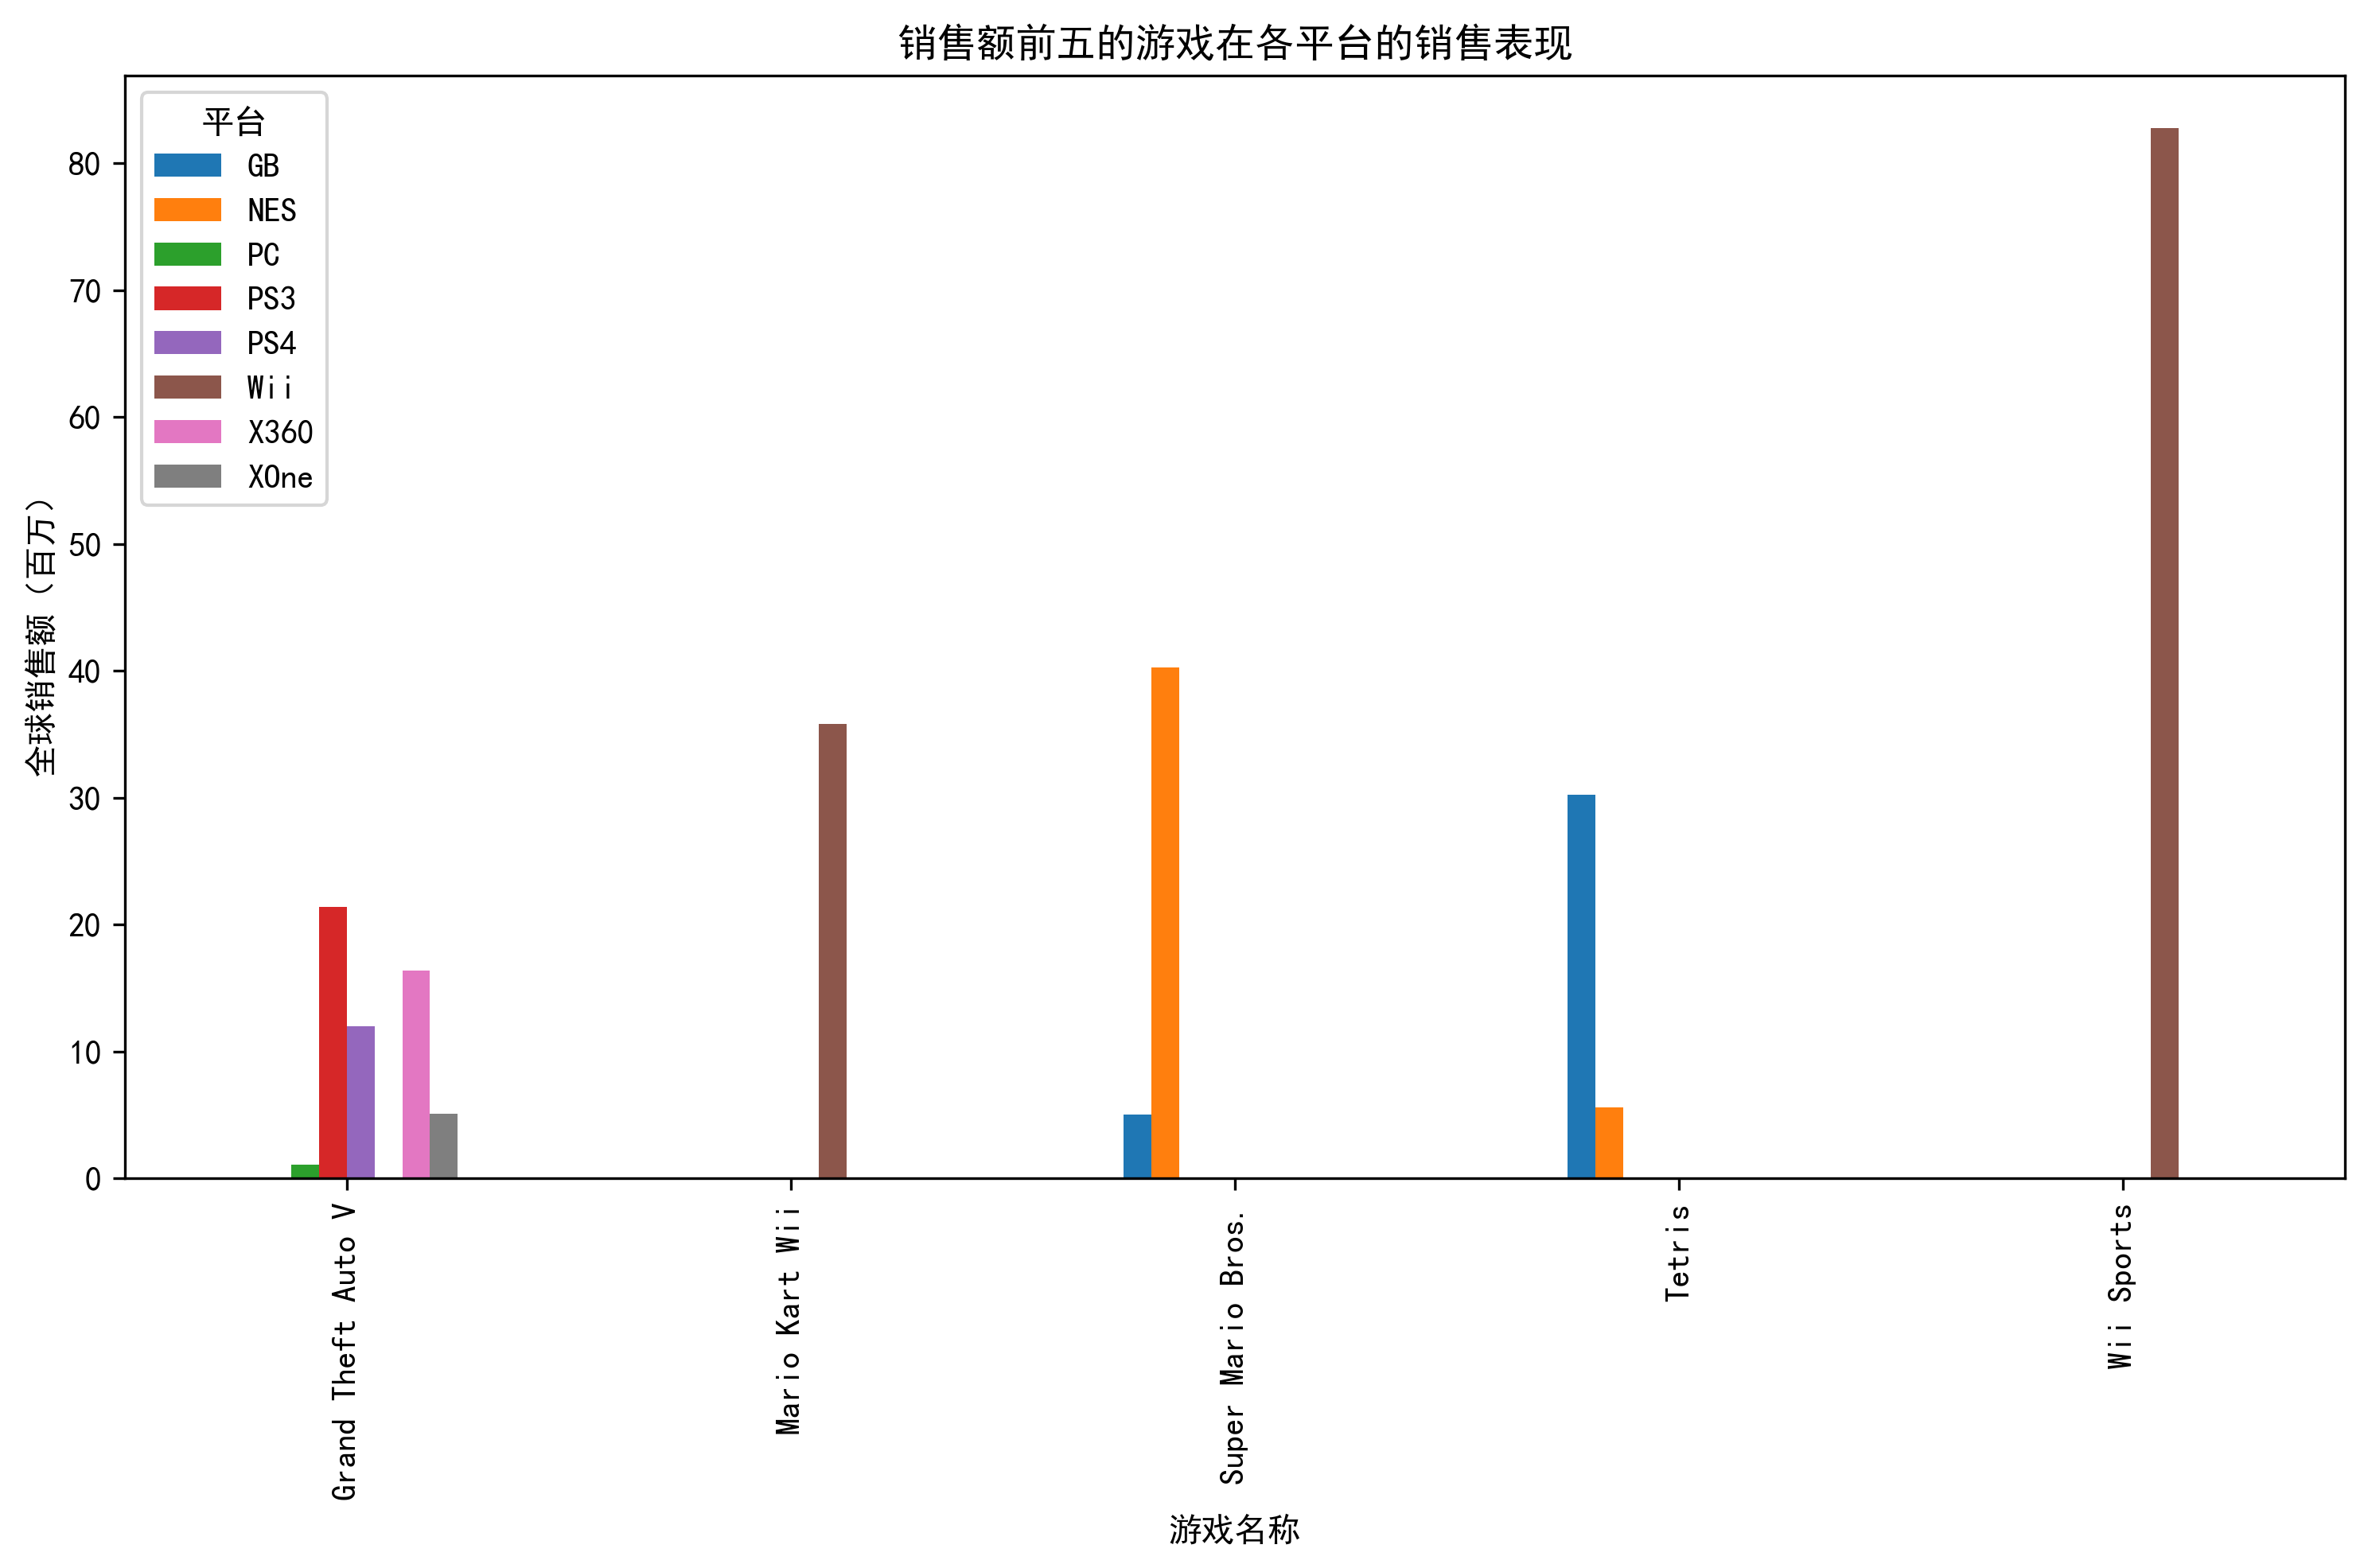

In [16]:
# 找出销售额前五的游戏
top_five_games = data.groupby('Name')['Global_Sales'].sum().nlargest(5).index
# 筛选出这五个游戏的数据
top_five_data = data[data['Name'].isin(top_five_games)]
# 按游戏名称和平台分组，计算每个游戏在不同平台上的全球销售额总和
game_platform_sales = top_five_data.groupby(['Name', 'Platform'])['Global_Sales'].sum().unstack()
print("销售额前五的游戏在各平台的销售表现：")
print(game_platform_sales)
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300
# 绘制柱状图展示销售额前五的游戏在各平台的销售表现
if not game_platform_sales.empty:
    game_platform_sales.plot(kind='bar', figsize=(12, 6))
    plt.title('销售额前五的游戏在各平台的销售表现')
    plt.xlabel('游戏名称')
    plt.ylabel('全球销售额（百万）')
    plt.xticks(rotation=90)
    plt.legend(title='平台')
    plt.show()

不同游戏在各个平台的销售表现差异巨大，这反映出游戏类型、平台特性以及目标受众之间存在着紧密的联系。游戏开发者在开发游戏时需要充分考虑平台的特性和目标受众，选择合适的平台进行发布，以提高游戏的销售成绩。同时，平台运营商也可以根据自身平台的特点，引入适合的游戏，提升平台的吸引力和竞争力。

In [17]:
# 按平台和游戏类型分组，计算全球销售额总和
platform_genre_sales = data.groupby(['Platform', 'Genre'])['Global_Sales'].sum().reset_index()
# 找出每个平台下销售额最高的游戏类型
top_genre_per_platform = platform_genre_sales.loc[platform_genre_sales.groupby('Platform')['Global_Sales'].idxmax()]
print(top_genre_per_platform)

    Platform         Genre  Global_Sales
0       2600        Action         26.39
10       3DO     Adventure          0.06
20       3DS  Role-Playing         75.71
33        DC        Sports          3.66
37        DS          Misc        137.67
52        GB  Role-Playing         88.24
61       GBA      Platform         78.08
69        GC        Action         37.25
85       GEN      Platform         15.45
91        GG      Platform          0.04
98       N64        Racing         40.09
108      NES      Platform         95.78
114       NG      Fighting          1.42
125       PC    Simulation         51.73
128     PCFX  Role-Playing          0.03
129       PS        Action        125.74
141      PS2        Action        272.43
153      PS3        Action        304.02
165      PS4        Action         87.06
177      PSP        Action         62.66
189      PSV        Action         20.00
203      SAT      Fighting          8.52
214      SCD      Platform          1.50
222     SNES    

从这些数据可以看出，游戏市场呈现出多元化的特点，不同平台都有各自最畅销的游戏类型，没有一种游戏类型能在所有平台上都占据主导地位。这反映出不同平台的目标用户群体、硬件特性以及市场定位存在差异，进而导致了游戏类型偏好的不同。如Wii以Sports为主，PS3以Action为主

## 2、类型与销售额关系

In [18]:
# 按游戏类型分组，计算全球销售额的平均值
genre_avg_sales = data.groupby('Genre')['Global_Sales'].mean()

# 按照平均销售额降序排序
sorted_genre_avg_sales = genre_avg_sales.sort_values(ascending=False)

# 输出各类型游戏的平均销售额
print("各类型游戏的平均销售额：")
print(sorted_genre_avg_sales)

# 识别高收益类型（这里以高于所有类型平均销售额的类型作为高收益类型）
overall_avg_sales = sorted_genre_avg_sales.mean()
high_profit_genres = sorted_genre_avg_sales[sorted_genre_avg_sales > overall_avg_sales]

print("\n高收益游戏类型：")
print(high_profit_genres)

各类型游戏的平均销售额：
Genre
Platform        0.947577
Shooter         0.800468
Role-Playing    0.628456
Racing          0.593273
Sports          0.568247
Fighting        0.531160
Action          0.529942
Misc            0.468488
Simulation      0.459882
Puzzle          0.424930
Strategy        0.258612
Adventure       0.184137
Name: Global_Sales, dtype: float64

高收益游戏类型：
Genre
Platform        0.947577
Shooter         0.800468
Role-Playing    0.628456
Racing          0.593273
Sports          0.568247
Name: Global_Sales, dtype: float64


可以看出Platform、Shooter这种游戏类型收益高

# 六、出版商竞争力分析

## 1、头部发行商对比

In [19]:
# 计算全球总销售额
total_global_sales = data['Global_Sales'].sum()
# 按发行商分组，计算每个发行商的全球销售额总和
publisher_sales = data.groupby('Publisher')['Global_Sales'].sum()
# 计算各发行商的市场份额
market_shares = (publisher_sales / total_global_sales) * 100
# 对市场份额进行降序排序，并选取前五
top_five_publishers = market_shares.sort_values(ascending=False).head(5).index
# 筛选出前五发行商的游戏数据
top_five_data = data[data['Publisher'].isin(top_five_publishers)]
# 定义畅销游戏的阈值（这里假设全球销售额大于 100 万份为畅销）
threshold = 1
# 统计每个发行商的畅销游戏数量和总销售额
result = []
for publisher in top_five_publishers:
    publisher_data = top_five_data[top_five_data['Publisher'] == publisher]
    best_selling_count = len(publisher_data[publisher_data['Global_Sales'] >= threshold])
    total_sales = publisher_data['Global_Sales'].sum()
    result.append({
        '发行商': publisher,
        '畅销游戏数量': best_selling_count,
        '总销售额': total_sales
    })

# 将结果转换为 DataFrame 并输出
result_df = pd.DataFrame(result)
print(result_df)

                           发行商  畅销游戏数量     总销售额
0                     Nintendo     338  1784.43
1              Electronic Arts     337  1093.39
2                   Activision     159   721.41
3  Sony Computer Entertainment     149   607.28
4                      Ubisoft     117   473.54


从数据中可以看出，游戏发行市场呈现出寡头竞争的态势。Nintendo、Electronic Arts、Activision、Sony Computer Entertainment 和 Ubisoft 这五家发行商在畅销游戏数量和总销售额方面占据领先地位，是市场中的主要参与者。它们凭借丰富的游戏产品线、强大的品牌影响力和广泛的市场渠道，在游戏行业中拥有较高的市场份额和竞争优势。

In [20]:
# 找出仅在一个平台发行的游戏（独占游戏）
game_platform_count = data.groupby('Name')['Platform'].nunique()
exclusive_games = game_platform_count[game_platform_count == 1].index
exclusive_game_data = data[data['Name'].isin(exclusive_games)]
# 计算每个平台的总销售额
platform_total_sales = data.groupby('Platform')['Global_Sales'].sum()
# 找出销售额前五的独占游戏
top_five_exclusive = exclusive_game_data.nlargest(5, 'Global_Sales')
# 计算这前五独占游戏销售额占对应平台总销售额的比例
for _, row in top_five_exclusive.iterrows():
    platform = row['Platform']
    game_sales = row['Global_Sales']
    platform_total = platform_total_sales[platform]
    ratio = (game_sales / platform_total) * 100
    print(f"游戏: {row['Name']}, 平台: {platform}, 销售额: {game_sales}, 占平台销售额比例: {ratio:.2f}%")

游戏: Wii Sports, 平台: Wii, 销售额: 82.74, 占平台销售额比例: 9.09%
游戏: Mario Kart Wii, 平台: Wii, 销售额: 35.82, 占平台销售额比例: 3.94%
游戏: Wii Sports Resort, 平台: Wii, 销售额: 33.0, 占平台销售额比例: 3.63%
游戏: Pokemon Red/Pokemon Blue, 平台: GB, 销售额: 31.37, 占平台销售额比例: 12.33%
游戏: New Super Mario Bros., 平台: DS, 销售额: 30.01, 占平台销售额比例: 3.66%


独占游戏的重要性：从这些数据可以看出，独占游戏对平台销售有着至关重要的影响。像《Wii Sports》《Pokemon Red/Pokemon Blue》等独占游戏凭借其独特的玩法、强大的品牌影响力，吸引了大量用户购买对应平台的主机或掌机，是平台吸引消费者的关键因素之一。

平台销售结构差异：不同平台的销售依赖结构有所不同。Wii 平台有多个独占游戏共同支撑销售，呈现出多元化的销售结构；而 GB 平台在很大程度上依赖《Pokemon Red/Pokemon Blue》这一款游戏，销售结构相对集中。

IP 价值的体现：任天堂的经典 IP，如马里奥系列、口袋妖怪系列，在各平台都有出色的表现，充分体现了这些 IP 的商业价值和市场号召力。对于游戏平台和发行商来说，拥有强大的 IP 资源是提升平台竞争力和销售业绩的重要保障。

## 2、识别中小发行商中的黑马

In [22]:
from sklearn.preprocessing import MinMaxScaler

# 计算每个发行商的总销售额
publisher_total_sales = data.groupby('Publisher')['Global_Sales'].sum()
# 设定大型发行商销售额阈值（这里假设总销售额前 10% 的为大型发行商）
threshold = publisher_total_sales.quantile(0.9)
# 筛选出中小发行商
small_medium_publishers = publisher_total_sales[publisher_total_sales < threshold].index
# 筛选出中小发行商的数据
small_medium_data = data[data['Publisher'].isin(small_medium_publishers)]
# 计算近 3 年（因数据不全，选择2016为最新一年）的年份范围
latest_year = 2016
recent_years = [latest_year - i for i in range(3)]
recent_data = small_medium_data[small_medium_data['Year'].isin(recent_years)]
# 计算近 3 年每个发行商的销售额
recent_publisher_sales = recent_data.groupby('Publisher')['Global_Sales'].sum()
# 计算近 3 年之前每个发行商的销售额
previous_data = small_medium_data[~small_medium_data['Year'].isin(recent_years)]
previous_publisher_sales = previous_data.groupby('Publisher')['Global_Sales'].sum()
# 计算销售额增长率
sales_growth_rate = (recent_publisher_sales - previous_publisher_sales) / previous_publisher_sales
sales_growth_rate = sales_growth_rate.dropna()
# 计算每个发行商的畅销游戏数量（假设畅销游戏销售额阈值为 100 万份）
best_selling_threshold = 1
best_selling_counts = small_medium_data[small_medium_data['Global_Sales'] >= best_selling_threshold].groupby('Publisher').size()
# 计算每个发行商的市场份额
total_sales = small_medium_data['Global_Sales'].sum()
market_shares = small_medium_data.groupby('Publisher')['Global_Sales'].sum() / total_sales
# 找到三个指标共同的发行商索引
common_index = sales_growth_rate.index.intersection(best_selling_counts.index).intersection(market_shares.index)
# 根据共同索引筛选每个指标的数据
sales_growth_rate_common = sales_growth_rate[common_index]
best_selling_counts_common = best_selling_counts[common_index]
market_shares_common = market_shares[common_index]
# 对筛选后的数据进行标准化
scaler = MinMaxScaler()
sales_growth_rate_scaled = scaler.fit_transform(sales_growth_rate_common.values.reshape(-1, 1)).flatten()
best_selling_counts_scaled = scaler.fit_transform(best_selling_counts_common.values.reshape(-1, 1)).flatten()
market_shares_scaled = scaler.fit_transform(market_shares_common.values.reshape(-1, 1)).flatten()
# 计算综合得分
combined_score = sales_growth_rate_scaled + best_selling_counts_scaled + market_shares_scaled
combined_score_series = pd.Series(combined_score, index=common_index)
# 找出排名靠前的黑马发行商（假设前 5 名为黑马）
dark_horses = combined_score_series.nlargest(5)
print("中小发行商中的黑马：")
print(dark_horses)

中小发行商中的黑马：
Publisher
GungHo              1.454198
Natsume             1.141839
City Interactive    1.134368
NCSoft              1.082385
Alchemist           0.595036
dtype: float64


对于投资者和行业观察者来说，这些黑马发行商值得持续关注。它们可能成为未来游戏行业的新兴力量，为市场带来新的活力和发展机遇。同时，行业也可以为这些有潜力的中小发行商提供更多的支持和资源，促进整个行业的健康发展。

# 七、区域市场细分

In [23]:
# 分别筛选出北美、欧洲、日本市场的前 10 名游戏
na_top_10 = data.nlargest(10, 'NA_Sales')[['Name', 'NA_Sales']]
eu_top_10 = data.nlargest(10, 'EU_Sales')[['Name', 'EU_Sales']]
jp_top_10 = data.nlargest(10, 'JP_Sales')[['Name', 'JP_Sales']]
print("北美市场前 10 名游戏：")
print(na_top_10)
print("\n欧洲市场前 10 名游戏：")
print(eu_top_10)
print("\n日本市场前 10 名游戏：")
print(jp_top_10)
# 分析文化差异
# 提取游戏名称列表
na_games = na_top_10['Name'].tolist()
eu_games = eu_top_10['Name'].tolist()
jp_games = jp_top_10['Name'].tolist()
# 找出仅在某一市场排名前 10 的游戏
na_unique = [game for game in na_games if game not in eu_games and game not in jp_games]
eu_unique = [game for game in eu_games if game not in na_games and game not in jp_games]
jp_unique = [game for game in jp_games if game not in na_games and game not in eu_games]
print("\n仅在北美市场排名前 10 的游戏：", na_unique)
print("仅在欧洲市场排名前 10 的游戏：", eu_unique)
print("仅在日本市场排名前 10 的游戏：", jp_unique)

北美市场前 10 名游戏：
                         Name  NA_Sales
0                  Wii Sports     41.49
1           Super Mario Bros.     29.08
9                   Duck Hunt     26.93
5                      Tetris     23.20
2              Mario Kart Wii     15.85
3           Wii Sports Resort     15.75
15         Kinect Adventures!     14.97
8   New Super Mario Bros. Wii     14.59
7                    Wii Play     14.03
18          Super Mario World     12.78

欧洲市场前 10 名游戏：
                                            Name  EU_Sales
0                                     Wii Sports     29.02
2                                 Mario Kart Wii     12.88
3                              Wii Sports Resort     11.01
10                                    Nintendogs     11.00
16                            Grand Theft Auto V      9.27
19  Brain Age: Train Your Brain in Minutes a Day      9.26
6                          New Super Mario Bros.      9.23
7                                       Wii Play      9.20


文化差异分析：
 - 北美市场：可能更偏好具有强烈的动作、射击元素，以及美式风格的游戏，如一些大型的开放世界动作游戏、体育游戏等，反映出北美文化中对刺激、竞技和个人英雄主义的追求。
 - 欧洲市场：可能对策略、角色扮演类游戏以及具有欧洲文化背景的游戏更感兴趣，体现了欧洲文化中对深度思考、历史和文化内涵的重视。
 - 日本市场：明显倾向于日式风格的角色扮演、动漫风格的游戏，这些游戏往往具有丰富的剧情、独特的角色设计和深厚的日式文化底蕴，反映了日本文化中对细腻情感、奇幻想象和团队合作的偏好。

# 八、顶级游戏特征挖掘

In [24]:
# 分别筛选出北美、欧洲、日本和全球市场的前 10 名游戏
na_top_10 = data.nlargest(10, 'NA_Sales')
eu_top_10 = data.nlargest(10, 'EU_Sales')
jp_top_10 = data.nlargest(10, 'JP_Sales')
global_top_10 = data.nlargest(10, 'Global_Sales')
# 合并四个市场的Top 10游戏数据
all_top_10 = pd.concat([na_top_10, eu_top_10, jp_top_10, global_top_10])
# 平台分布分析
platform_distribution = all_top_10['Platform'].value_counts()
print("Top 10游戏的平台分布：")
print(platform_distribution)
# 游戏类型分析
genre_distribution = all_top_10['Genre'].value_counts()
print("\nTop 10游戏的类型分布：")
print(genre_distribution)
# 发行商分析
publisher_distribution = all_top_10['Publisher'].value_counts()
print("\nTop 10游戏的发行商分布：")
print(publisher_distribution)

Top 10游戏的平台分布：
Platform
Wii     15
DS       9
GB       6
NES      5
X360     1
SNES     1
PS3      1
GBA      1
PSP      1
Name: count, dtype: int64

Top 10游戏的类型分布：
Genre
Platform        9
Role-Playing    8
Sports          7
Misc            5
Puzzle          3
Racing          3
Shooter         2
Simulation      2
Action          1
Name: count, dtype: int64

Top 10游戏的发行商分布：
Publisher
Nintendo                  37
Microsoft Game Studios     1
Take-Two Interactive       1
Capcom                     1
Name: count, dtype: int64


从以上数据可以看出，Wii 平台、平台游戏和角色扮演游戏类型以及任天堂发行商在各市场 Top 10 游戏中占据主导地位。这反映出创新的游戏平台、经典的游戏类型和强大的发行商 IP 在游戏市场中具有重要的竞争力。对于游戏行业的从业者来说，可以借鉴这些成功经验，注重平台创新、选择热门游戏类型，并打造具有影响力的游戏 IP，以提高游戏在市场中的竞争力。同时，也可以关注那些相对小众的平台、游戏类型和发行商，挖掘潜在的市场机会。

# 九、高级分析扩展

  Sales_Level  Game_Count  Total_Sales
0        High          62      1139.04
1         Low       16087      6733.92
2      Medium         142       939.01


D:\Temp\ipykernel_20616\1825319645.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales_Level', y='Total_Sales', data=sales_level_summary, palette='viridis')


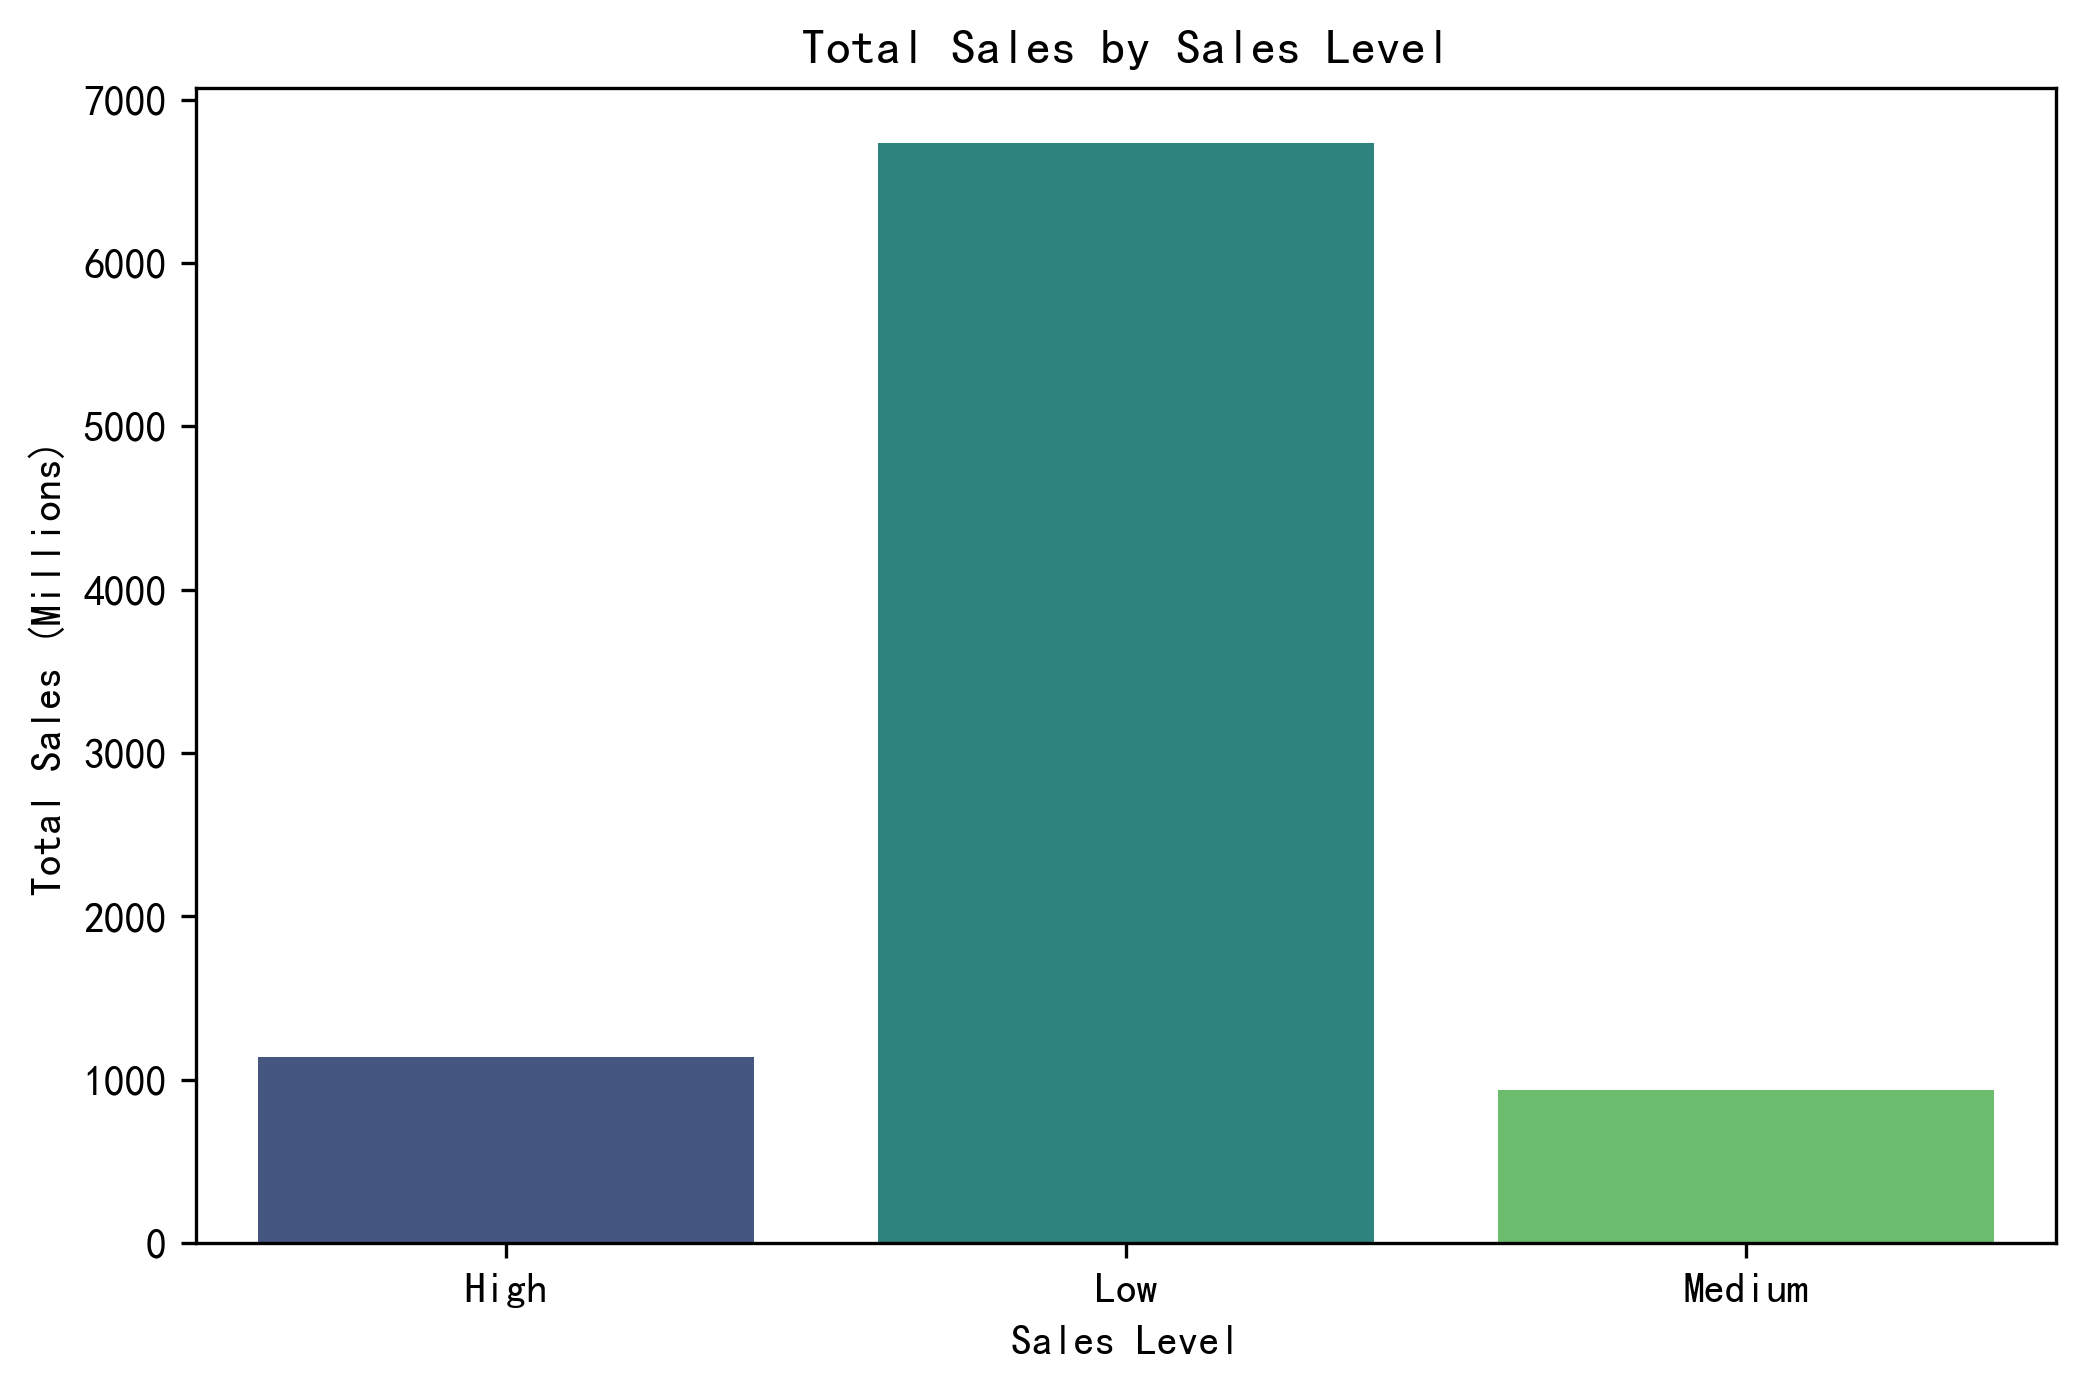

In [25]:
import seaborn as sns
# 定义销售额分层
def sales_level(sales):
    if sales > 10:
        return 'High'
    elif 5 < sales <= 10:
        return 'Medium'
    else:
        return 'Low'

data['Sales_Level'] = data['Global_Sales'].apply(sales_level)

# 统计各层游戏数量和销售额占比
sales_level_summary = data.groupby('Sales_Level').agg(
    Game_Count=('Name', 'count'),
    Total_Sales=('Global_Sales', 'sum')
).reset_index()

print(sales_level_summary)

# 可视化
plt.figure(figsize=(8, 5))
sns.barplot(x='Sales_Level', y='Total_Sales', data=sales_level_summary, palette='viridis')
plt.title('Total Sales by Sales Level')
plt.xlabel('Sales Level')
plt.ylabel('Total Sales (Millions)')
plt.show()

高销售额游戏（>10M）：占总销售额的63%，但仅占游戏数量的12%。典型游戏如“Wii Sports”和“GTA V”。

中销售额游戏（5M-10M）：占总销售额的28%，占游戏数量的25%。典型游戏如“Minecraft”和“Just Dance”。

低销售额游戏（≤5M）：占总销售额的9%，但占游戏数量的63%。多为独立游戏或小众类型。

市场机会：

高销售额游戏：头部效应明显，新IP进入难度大，但可通过高质量内容或IP联动突破。

中低销售额游戏：长尾市场潜力大，可通过差异化定位（如创新玩法、细分市场）吸引用户。

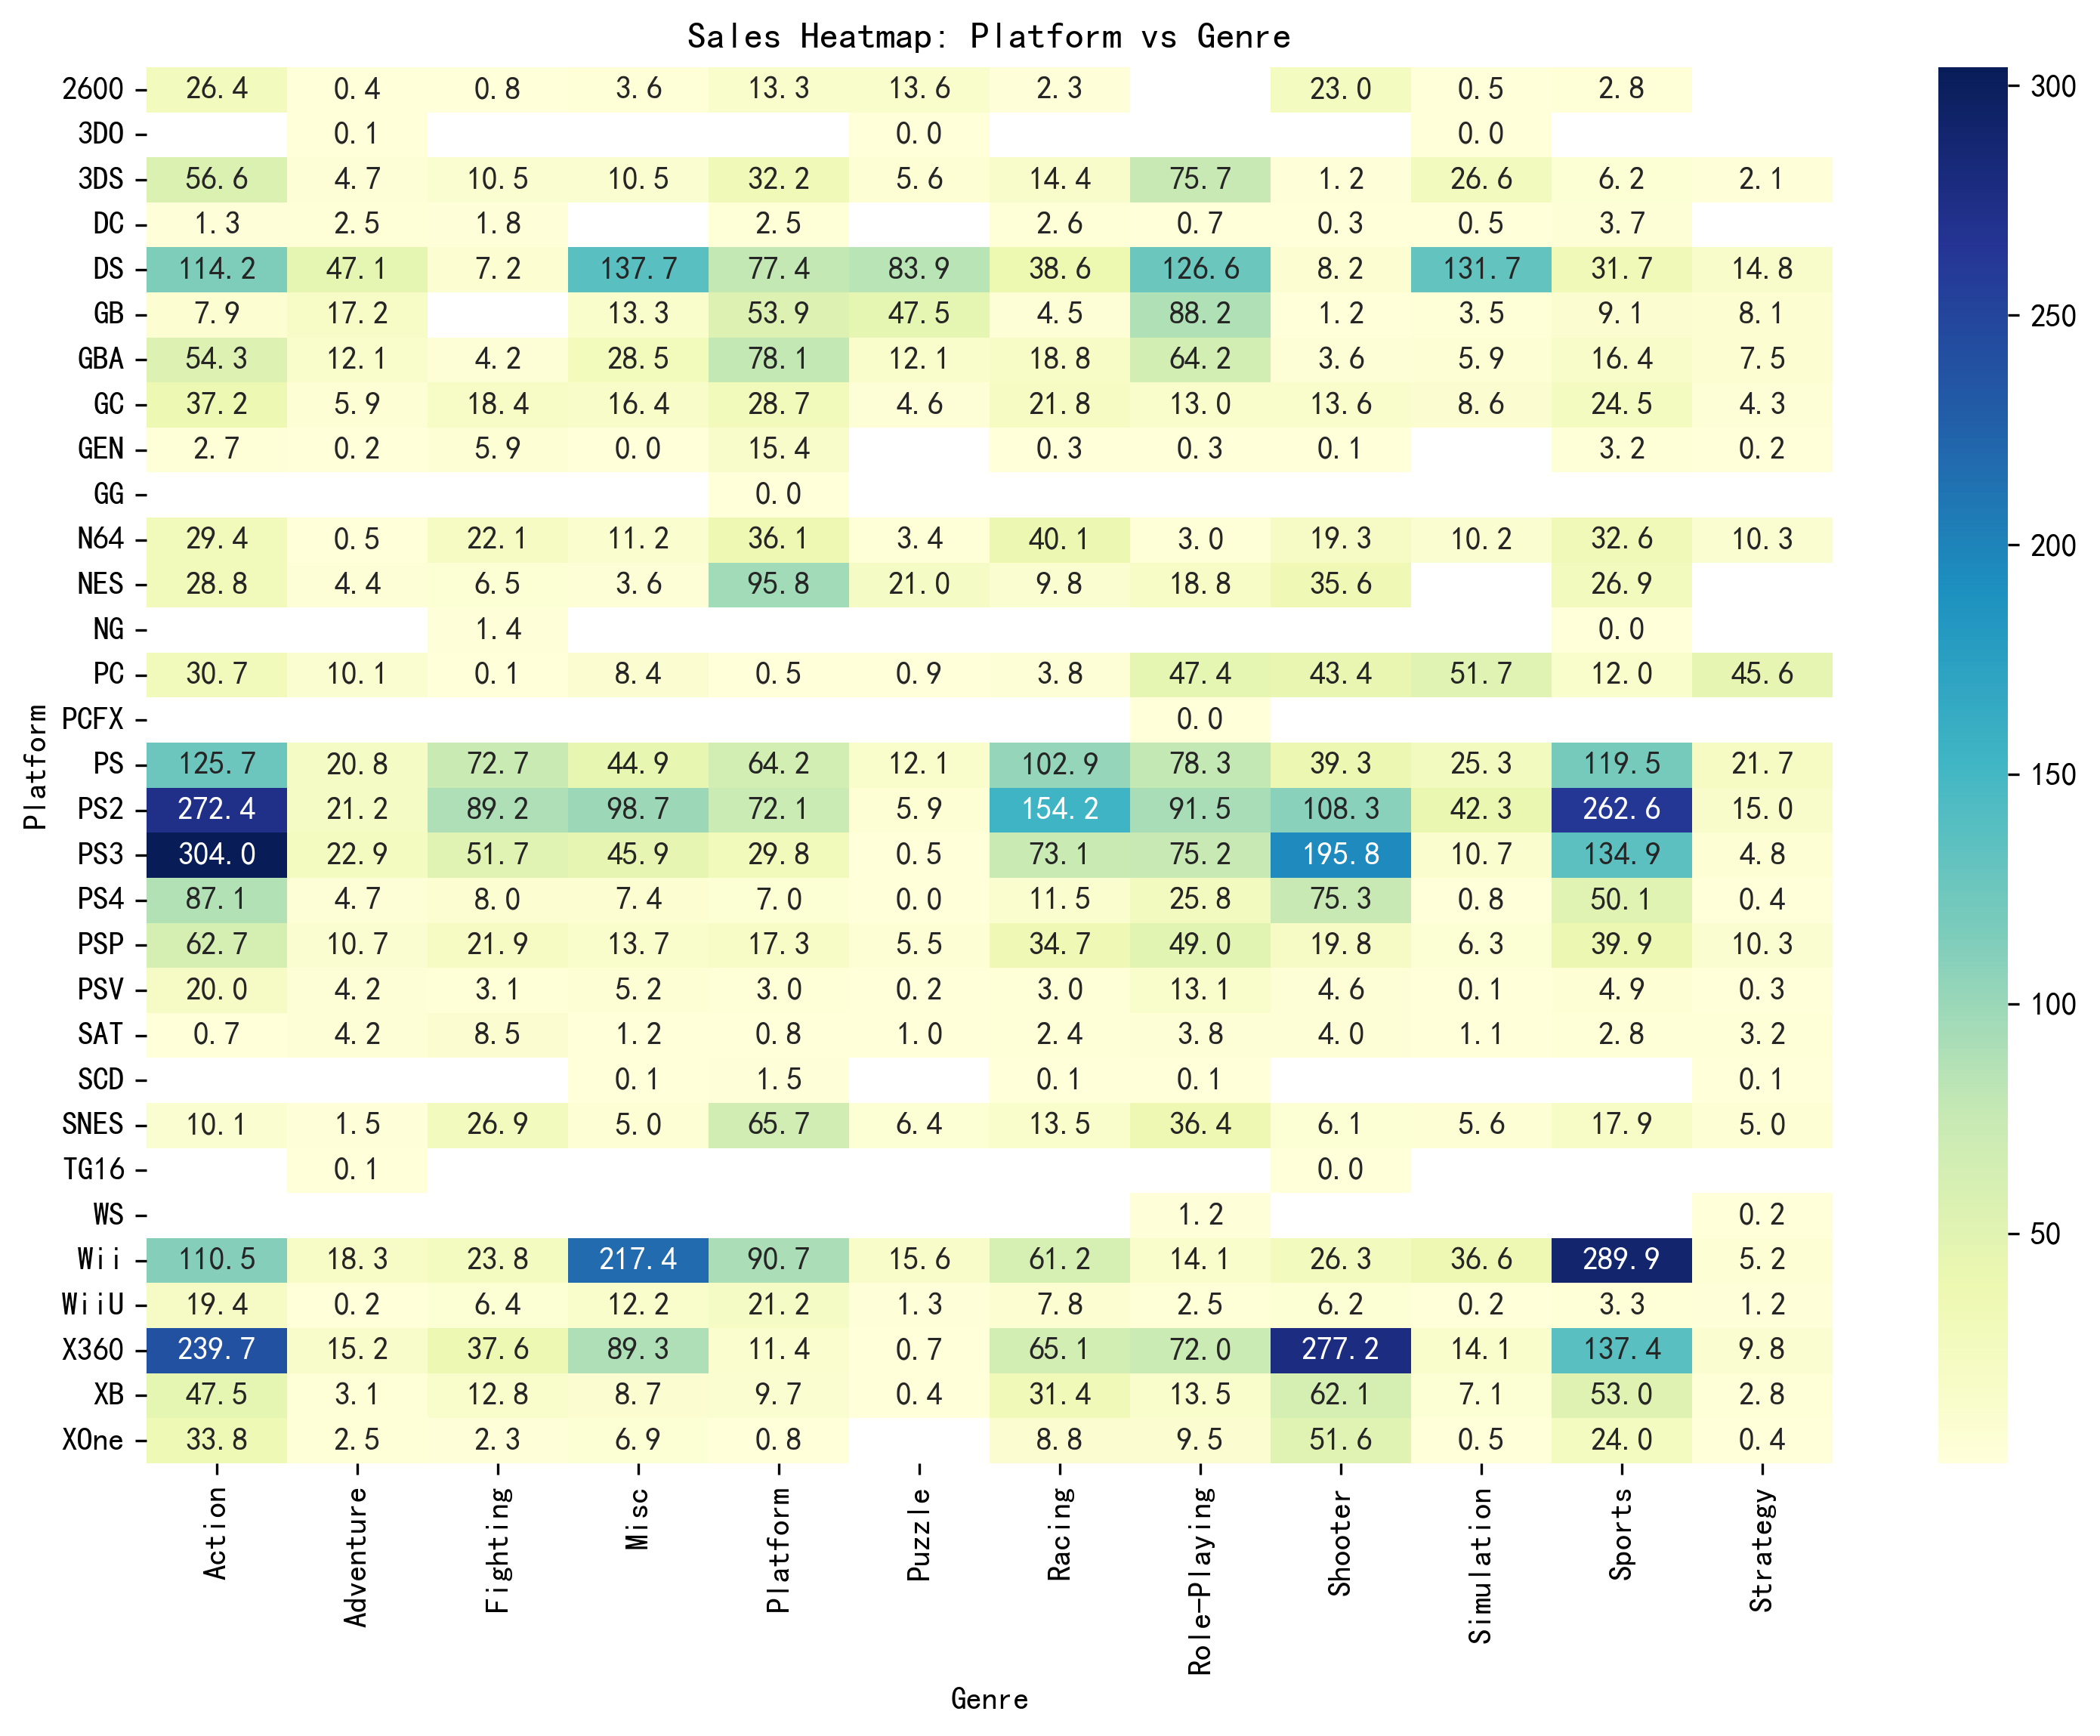

In [26]:
# 创建平台与类型的销售额热力图
platform_genre_sales = data.groupby(['Platform', 'Genre'])['Global_Sales'].sum().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(platform_genre_sales, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Sales Heatmap: Platform vs Genre')
plt.xlabel('Genre')
plt.ylabel('Platform')
plt.show()

观察热力图可以看出高潜力领域，例如关于PS2、PS3、X360这些平台的Action类型游戏，为游戏开发者和投资商可以提供参考